# Correlation

Compares the degree of linear association between a continuous variable and a continuous target.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import (
    f_regression,
    SelectPercentile,
)
from sklearn.model_selection import train_test_split

In [2]:
# load the California House price data
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

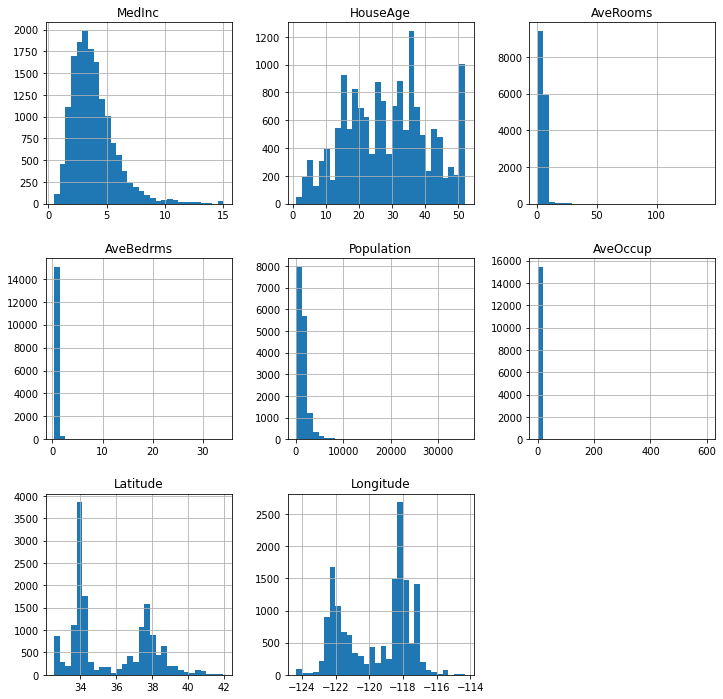

In [3]:
X_train.hist(bins=30, figsize=(12,12))
plt.show()

## Correlation

In [4]:
# on the entire data

univariate = f_regression(X_train, y_train)

# the output is one array with f-scores
# and one array with the pvalues

univariate

(array([1.43228768e+04, 1.74602749e+02, 3.73936211e+02, 2.74469506e+01,
        1.01599261e+01, 1.59941176e+01, 3.30604925e+02, 3.17583459e+01]),
 array([0.00000000e+00, 1.19851133e-39, 2.43044189e-82, 1.63580388e-07,
        1.43811689e-03, 6.38347779e-05, 4.08861089e-73, 1.77640721e-08]))

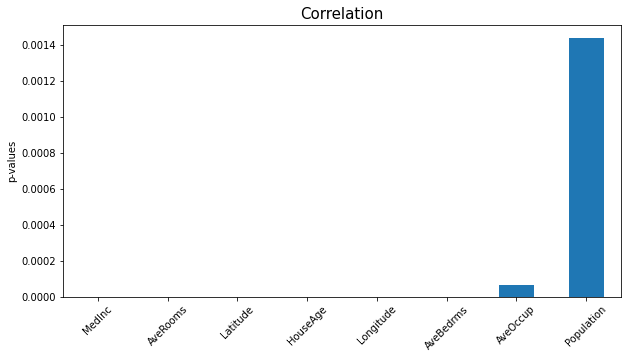

In [5]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

plt.rc('axes', titlesize=15) #fontsize of the title
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(10, 5), rot=45)
plt.ylabel('p-values')
plt.title('Correlation')
plt.show()

The smaller the p_value the more predictive the feature is.

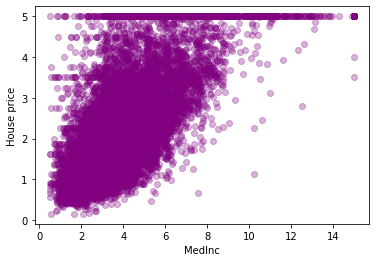

In [6]:
# variable with small p-value

plt.scatter(X_train["MedInc"], y_train, alpha=0.3, color="purple")
plt.xlabel('MedInc')
plt.ylabel('House price')
plt.show()

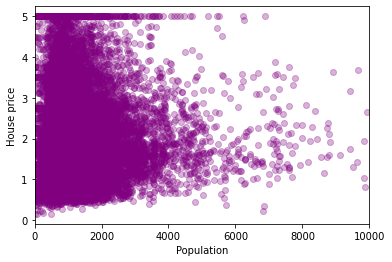

In [7]:
# variable with bigger p-value

plt.scatter(X_train["Population"], y_train, alpha=0.3, color="purple")
plt.xlim(0, 10000)
plt.xlabel('Population')
plt.ylabel('House price')
plt.show()

## Select top ranking features

In [8]:
sel = SelectPercentile(f_regression, percentile=30).fit(X_train, y_train)

# Display selected feature names

sel.get_feature_names_out()

array(['MedInc', 'AveRooms', 'Latitude'], dtype=object)

In [9]:
# remove low ranking features:

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

In [10]:
# sklearn returns numpy arrays. Convert to dataframe

X_train_t = pd.DataFrame(X_train_t, columns=sel.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns=sel.get_feature_names_out())

X_train_t.head()

,MedInc,AveRooms,Latitude
0,7.3003,7.961600,38.46
1,5.9547,6.547325,32.95
2,3.2125,5.207547,34.68
3,6.9930,6.428571,33.51
4,2.5162,4.429348,38.62
